In [207]:
#Load Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

In [142]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive') # Connect google drive in order to load data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
# Load Data
dataset = pd.read_table('/content/drive/MyDrive/Projects/wdbc.data', sep = ',', header=None)

# Show Data Information
with open("/content/drive/MyDrive/Projects/wdbc.names", 'r') as file:
    text = file.read()
print(text)

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

# Descriptive and Informational Statistics

In [144]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [145]:
dataset.info() # Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [146]:
dataset.describe() # Descriptive statistics

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [147]:
dataset.shape # Shape of Dataset

(569, 32)

In [148]:
# Fix column headings
dataset.columns = ['ID Number', 'Diagnosis', 'Radius_1', 'Texture_1', 'Perimeter_1', 'Area_1', 'Smoothness_1', 'Compactness_1', 'Concavity_1', 'Concave Points_1', 'Symmetry_1', 'Fractual Dimension_1',
                   'Radius_2', 'Texture_2', 'Perimeter_2', 'Area_2', 'Smoothness_2', 'Compactness_2', 'Concavity_2', 'Concave Points_2', 'Symmetry_2', 'Fractual Dimension_2',
                   'Radius_3', 'Texture_3', 'Perimeter_3', 'Area_3', 'Smoothness_3', 'Compactness_3', 'Concavity_3', 'Concave Points_3', 'Symmetry_3', 'Fractual Dimension_3']

-The columns can be broken up into categories: "1", "2" and "3. Where 1 indicates the mean, 2 indicates the standard error and 3 indicates the worst radius.

In [149]:
features_mean = list(dataset.columns[2:12]) # Separate out mean
features_se = list(dataset.columns[12:22]) # Separate out se
features_worst = list(dataset.columns[22:32]) # separate out worst
target = dataset['Diagnosis']
index = dataset['ID Number']

In [150]:
print(features_mean)
print(features_se)
print(features_worst)

['Radius_1', 'Texture_1', 'Perimeter_1', 'Area_1', 'Smoothness_1', 'Compactness_1', 'Concavity_1', 'Concave Points_1', 'Symmetry_1', 'Fractual Dimension_1']
['Radius_2', 'Texture_2', 'Perimeter_2', 'Area_2', 'Smoothness_2', 'Compactness_2', 'Concavity_2', 'Concave Points_2', 'Symmetry_2', 'Fractual Dimension_2']
['Radius_3', 'Texture_3', 'Perimeter_3', 'Area_3', 'Smoothness_3', 'Compactness_3', 'Concavity_3', 'Concave Points_3', 'Symmetry_3', 'Fractual Dimension_3']


In [151]:
 #Describe DataFrame columns
dataset.columns

Index(['ID Number', 'Diagnosis', 'Radius_1', 'Texture_1', 'Perimeter_1',
       'Area_1', 'Smoothness_1', 'Compactness_1', 'Concavity_1',
       'Concave Points_1', 'Symmetry_1', 'Fractual Dimension_1', 'Radius_2',
       'Texture_2', 'Perimeter_2', 'Area_2', 'Smoothness_2', 'Compactness_2',
       'Concavity_2', 'Concave Points_2', 'Symmetry_2', 'Fractual Dimension_2',
       'Radius_3', 'Texture_3', 'Perimeter_3', 'Area_3', 'Smoothness_3',
       'Compactness_3', 'Concavity_3', 'Concave Points_3', 'Symmetry_3',
       'Fractual Dimension_3'],
      dtype='object')

In [152]:
dataset.count() #Number of non-NA values

ID Number               569
Diagnosis               569
Radius_1                569
Texture_1               569
Perimeter_1             569
Area_1                  569
Smoothness_1            569
Compactness_1           569
Concavity_1             569
Concave Points_1        569
Symmetry_1              569
Fractual Dimension_1    569
Radius_2                569
Texture_2               569
Perimeter_2             569
Area_2                  569
Smoothness_2            569
Compactness_2           569
Concavity_2             569
Concave Points_2        569
Symmetry_2              569
Fractual Dimension_2    569
Radius_3                569
Texture_3               569
Perimeter_3             569
Area_3                  569
Smoothness_3            569
Compactness_3           569
Concavity_3             569
Concave Points_3        569
Symmetry_3              569
Fractual Dimension_3    569
dtype: int64

In [153]:
# Check for missing values
MissingValues = {col:dataset[dataset[col] == "?"].shape[0] for col in dataset.columns}
print(MissingValues)

{'ID Number': 0, 'Diagnosis': 0, 'Radius_1': 0, 'Texture_1': 0, 'Perimeter_1': 0, 'Area_1': 0, 'Smoothness_1': 0, 'Compactness_1': 0, 'Concavity_1': 0, 'Concave Points_1': 0, 'Symmetry_1': 0, 'Fractual Dimension_1': 0, 'Radius_2': 0, 'Texture_2': 0, 'Perimeter_2': 0, 'Area_2': 0, 'Smoothness_2': 0, 'Compactness_2': 0, 'Concavity_2': 0, 'Concave Points_2': 0, 'Symmetry_2': 0, 'Fractual Dimension_2': 0, 'Radius_3': 0, 'Texture_3': 0, 'Perimeter_3': 0, 'Area_3': 0, 'Smoothness_3': 0, 'Compactness_3': 0, 'Concavity_3': 0, 'Concave Points_3': 0, 'Symmetry_3': 0, 'Fractual Dimension_3': 0}


# Visualisation and Exploratory Data Analysis

In [154]:
dataset = dataset.drop('ID Number', axis=1) # Just drop this as we don't need it in data viz or eda

B    357
M    212
Name: Diagnosis, dtype: int64


<Axes: xlabel='Diagnosis', ylabel='count'>

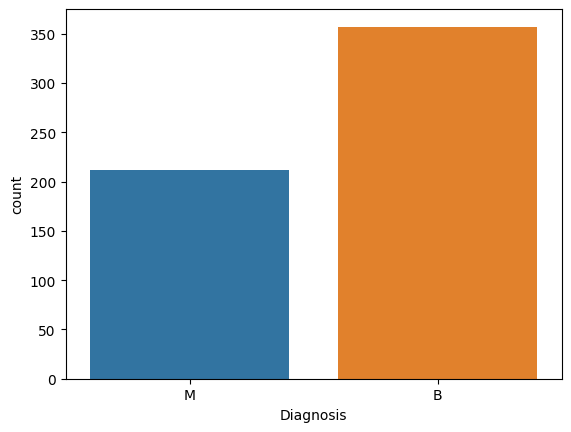

In [155]:
# Check our Target variable
print(dataset['Diagnosis'].value_counts())
sns.countplot(x="Diagnosis", data=dataset)

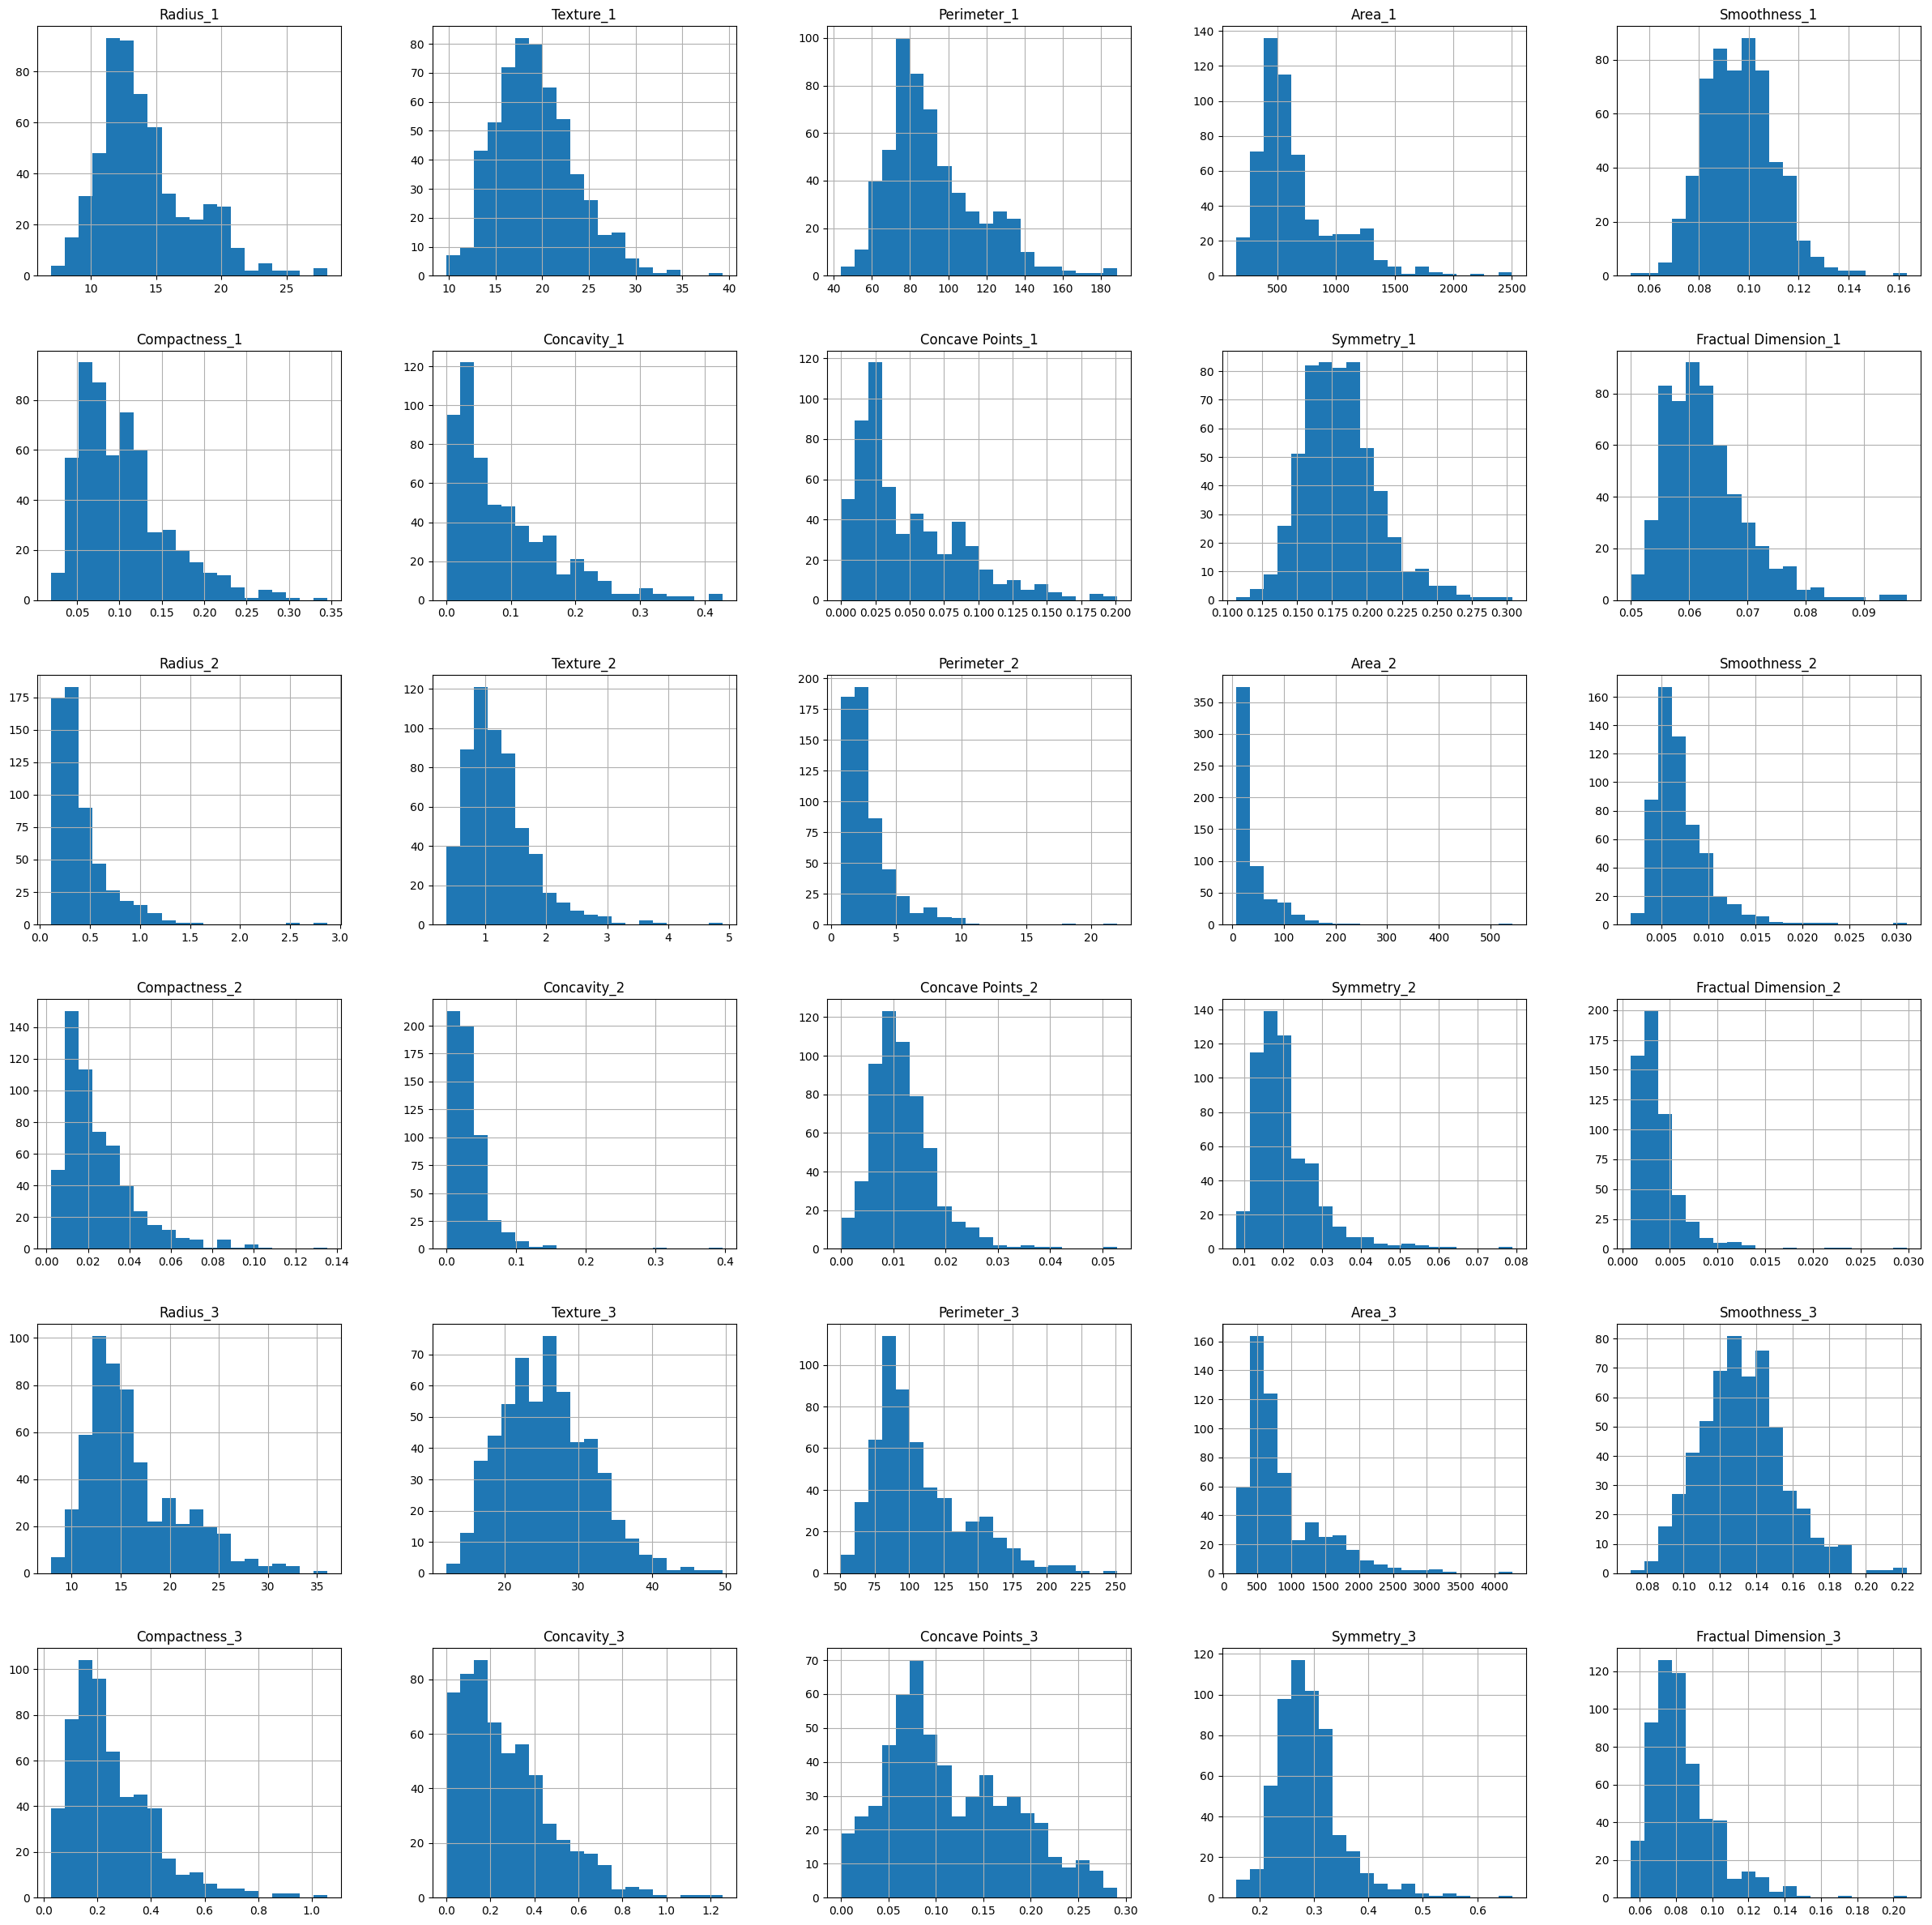

In [156]:
# Check Distribution of columns in dataset
dataset.hist(bins=20, figsize=(30,30));

Observations
- It appears to be a mix of normally distributed figures, and distrbutions with positive skews. We can test skewness and kurtosis.

In [157]:
# Skewness
print("Skewness of features:")
print(dataset.skew())
print("\n")
print("Kurtosis of features:")
print(dataset.kurtosis())

Skewness of features:
Radius_1                0.942380
Texture_1               0.650450
Perimeter_1             0.990650
Area_1                  1.645732
Smoothness_1            0.456324
Compactness_1           1.190123
Concavity_1             1.401180
Concave Points_1        1.171180
Symmetry_1              0.725609
Fractual Dimension_1    1.304489
Radius_2                3.088612
Texture_2               1.646444
Perimeter_2             3.443615
Area_2                  5.447186
Smoothness_2            2.314450
Compactness_2           1.902221
Concavity_2             5.110463
Concave Points_2        1.444678
Symmetry_2              2.195133
Fractual Dimension_2    3.923969
Radius_3                1.103115
Texture_3               0.498321
Perimeter_3             1.128164
Area_3                  1.859373
Smoothness_3            0.415426
Compactness_3           1.473555
Concavity_3             1.150237
Concave Points_3        0.492616
Symmetry_3              1.433928
Fractual Dimension_3 

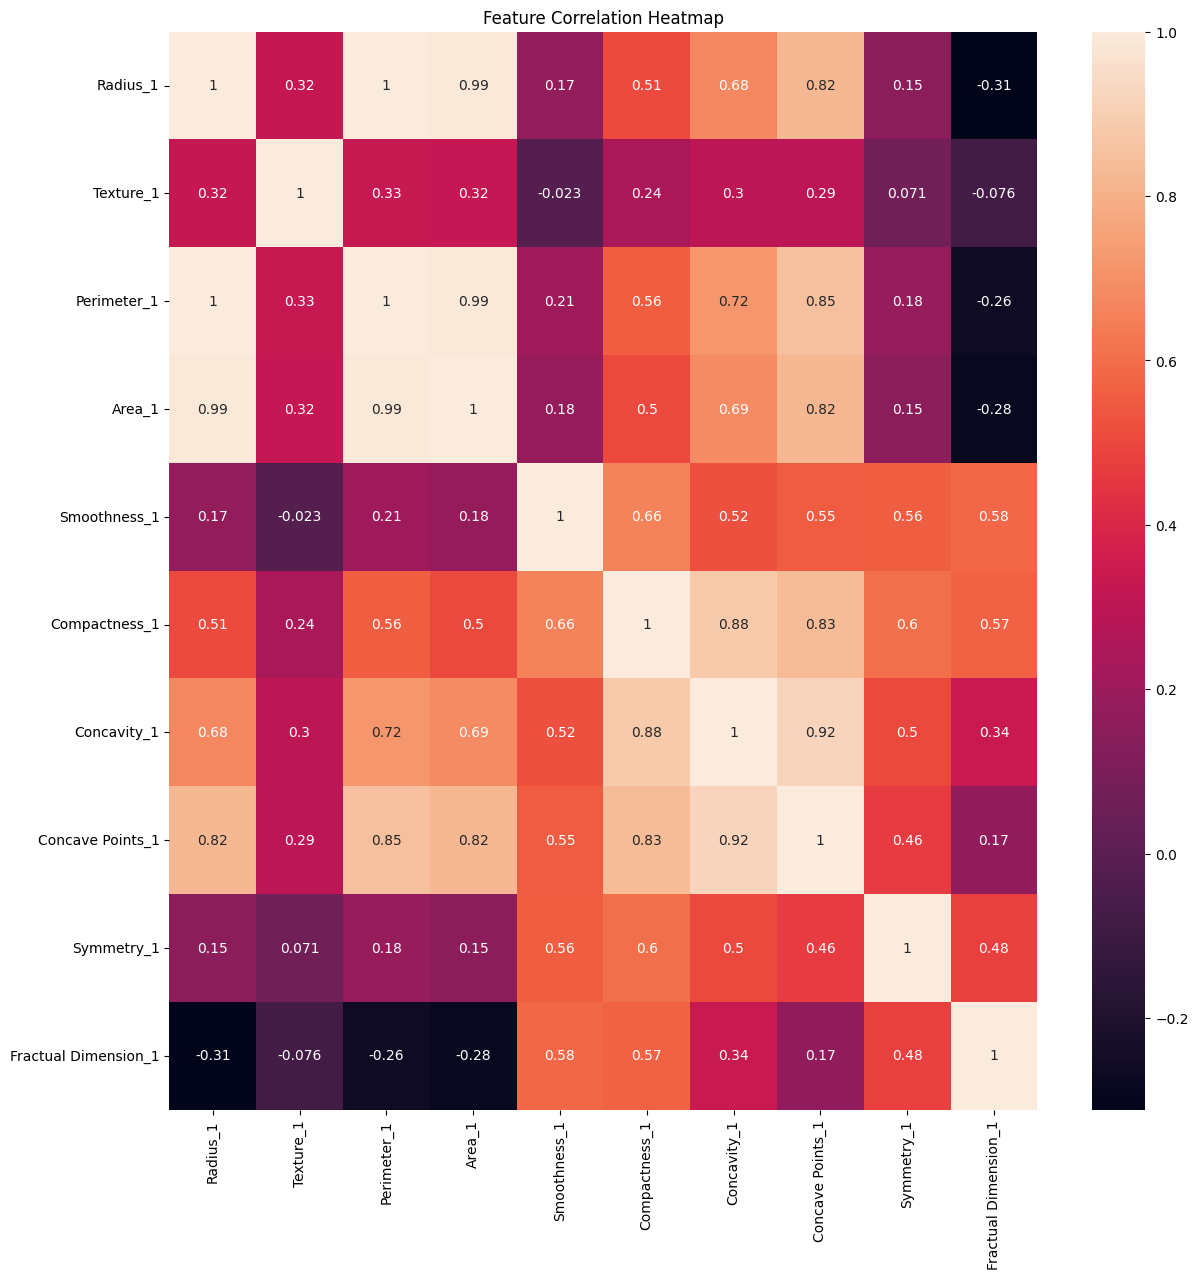

In [158]:
corr = dataset[features_mean].corr()
plt.figure(figsize=(14,14))
plt.title("Feature Correlation Heatmap")
sns.heatmap(corr, annot=True)
plt.show()

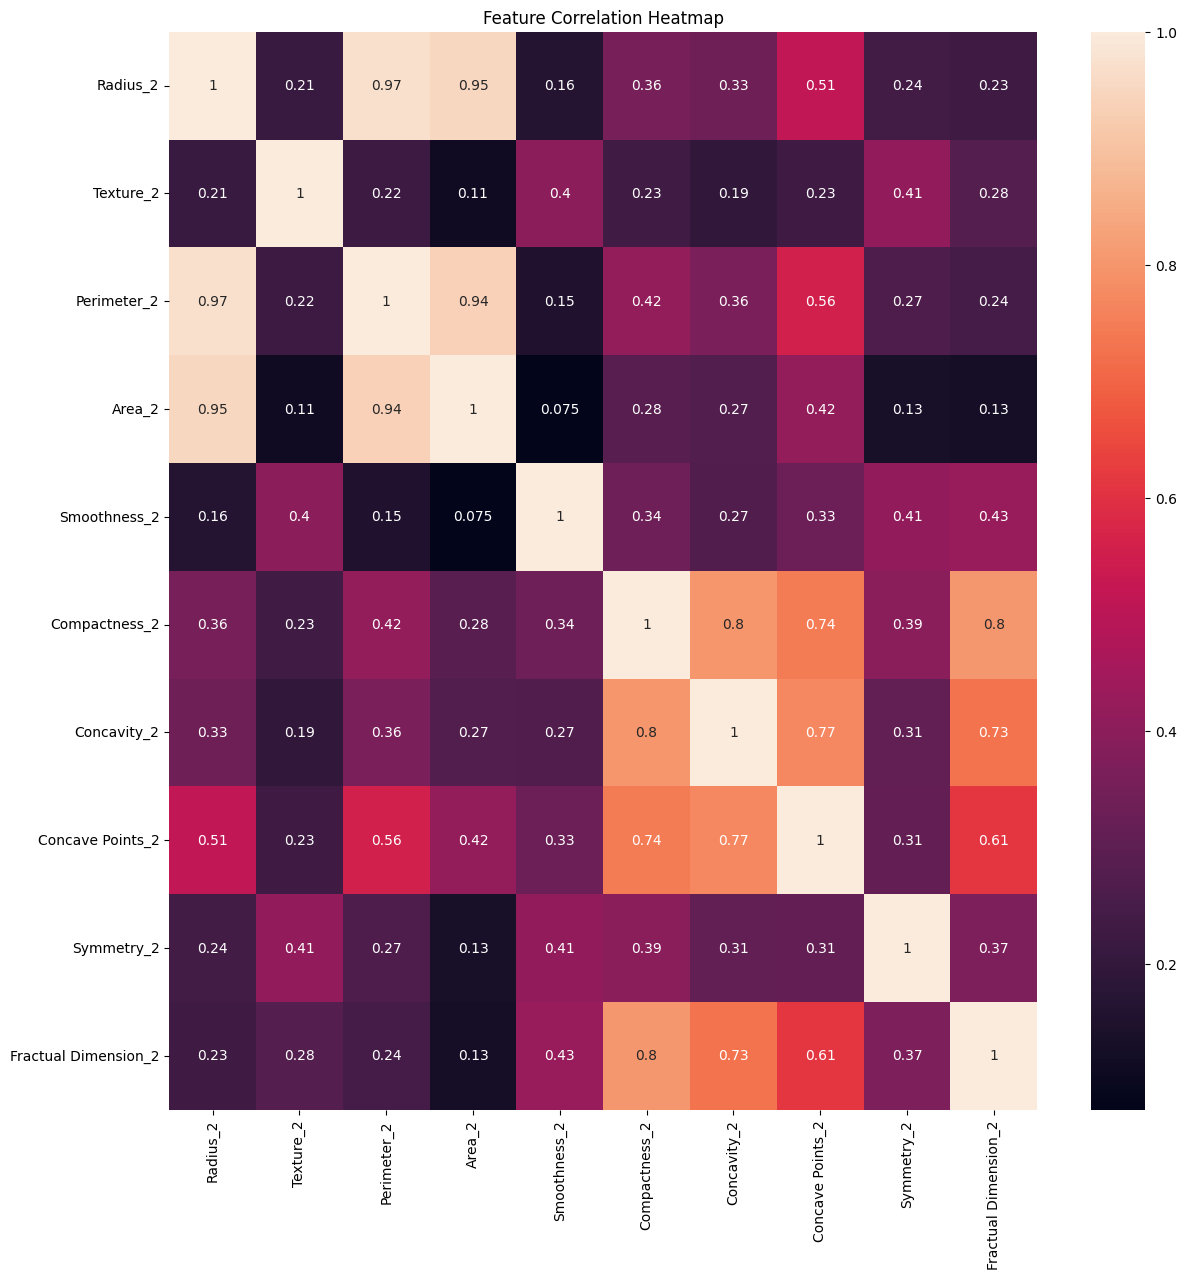

In [159]:
corr = dataset[features_se].corr()
plt.figure(figsize=(14,14))
plt.title("Feature Correlation Heatmap")
sns.heatmap(corr, annot=True)
plt.show()

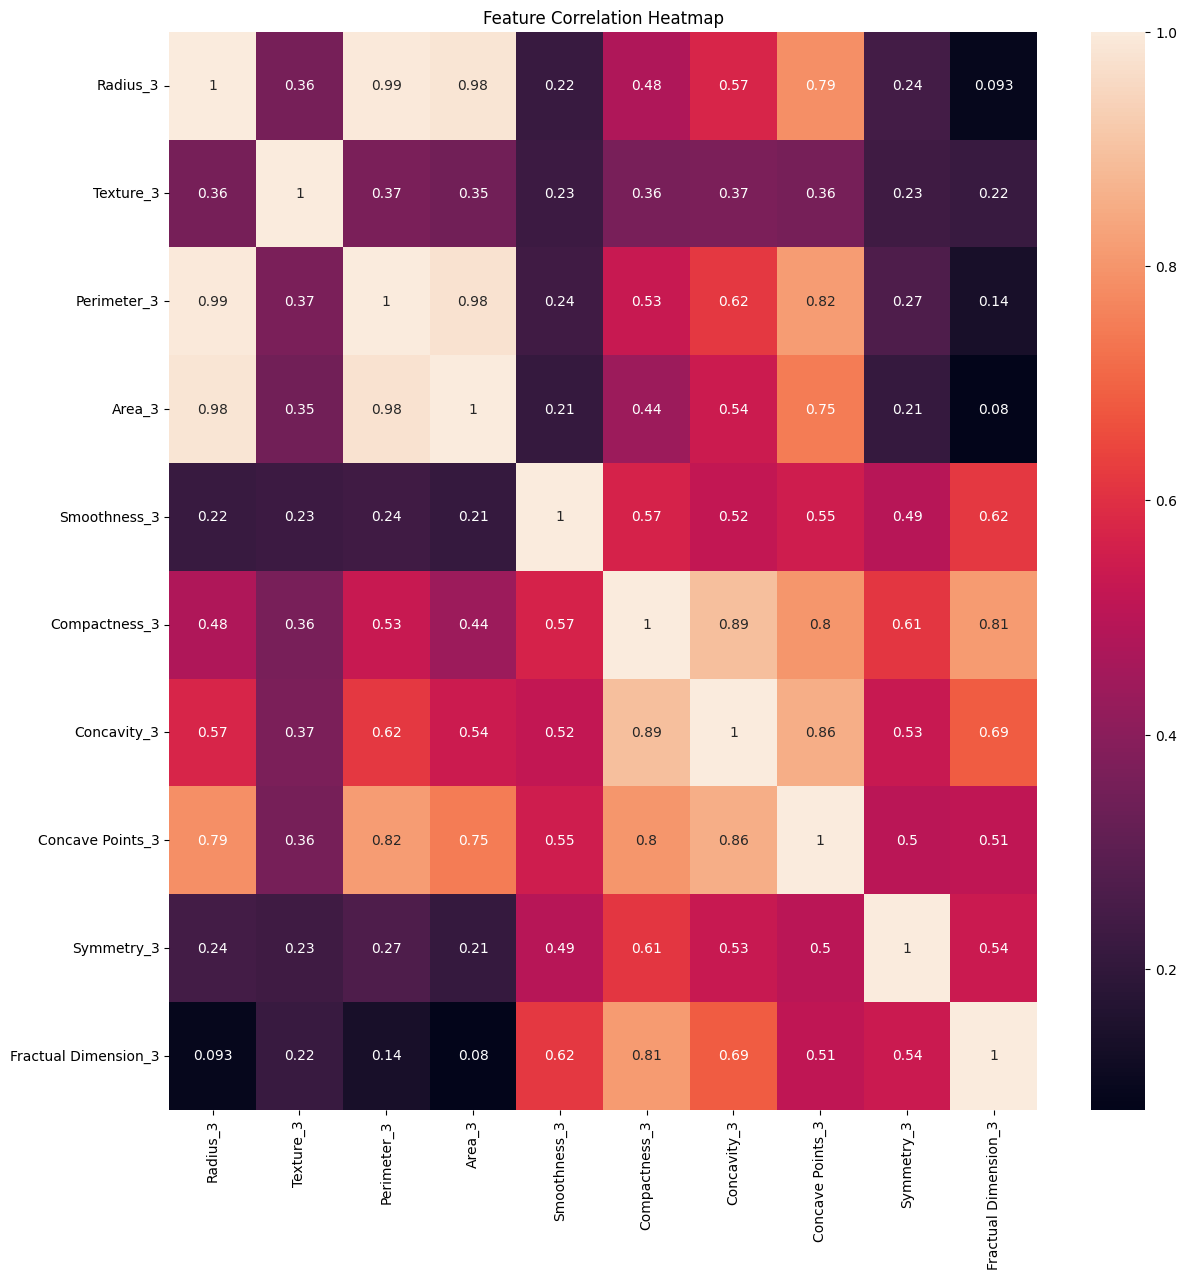

In [160]:
corr = dataset[features_worst].corr()
plt.figure(figsize=(14,14))
plt.title("Feature Correlation Heatmap")
sns.heatmap(corr, annot=True)
plt.show()

- Extremely high correlation between Radius, Perimeter and Area. To avoid multi-collinearity issues it will be worth dropping two of the three variables.
- Extremely high correlation between compactness, concavity and concave points.

In [161]:
drop =  ['Diagnosis','Perimeter_1','Radius_1','Compactness_1','Concave Points_1','Radius_2','Perimeter_2','Radius_3','Perimeter_3','Compactness_3','Concave Points_3','Compactness_2','Concave Points_2','Texture_3','Area_3']
features = dataset.drop(drop,axis = 1 )
features.head()


,Texture_1,Area_1,Smoothness_1,Concavity_1,Symmetry_1,Fractual Dimension_1,Texture_2,Area_2,Smoothness_2,Concavity_2,Symmetry_2,Fractual Dimension_2,Smoothness_3,Concavity_3,Symmetry_3,Fractual Dimension_3
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [162]:
map = {'B': 0, 'M': 1}
target = target.map(map)

# Defining the Model

We're going to build multiple models. And then use ensemble systems to produce the best results.

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [164]:
# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature_scaled = scaler.fit_transform(features)

print(feature_scaled)

[[-2.07333501  0.9843749   1.56846633 ...  2.10952635  2.75062224
   1.93701461]
 [-0.35363241  1.90870825 -0.82696245 ... -0.14674897 -0.24388967
   0.28118999]
 [ 0.45618695  1.55888363  0.94221044 ...  0.85497394  1.152255
   0.20139121]
 ...
 [ 2.0455738   0.57795264 -0.84048388 ...  0.3267666  -1.10454895
  -0.31840916]
 [ 2.33645719  1.73521799  1.52576706 ...  3.19760468  1.91908301
   2.21963528]
 [ 1.22179204 -1.34778924 -3.11208479 ... -1.30583065 -0.04813821
  -0.75120669]]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, test_size=0.30, random_state=42)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 16)
(171, 16)
(398,)
(171,)


In [167]:
# Naive Bayes as baseline
gnb = GaussianNB()

cv = cross_val_score(gnb, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.925      0.95       0.95       0.975      0.9        0.875
 0.9        0.95       0.97435897 0.84615385]
0.924551282051282


In [168]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
cv = cross_val_score(logreg, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.975      0.975      0.975      0.95       0.975      0.975
 0.975      0.95       1.         0.92307692]
0.9673076923076923


In [169]:
# Decision Tree
dt = tree.DecisionTreeClassifier(random_state=42)
cv = cross_val_score(dt, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.875      0.9        0.875      0.875      0.95       0.95
 0.9        0.875      0.8974359  0.92307692]
0.902051282051282


In [170]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()

cv = cross_val_score(knn, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.95       0.975      0.95       0.95       0.95       1.
 0.9        0.95       0.94871795 0.8974359 ]
0.9471153846153847


In [171]:
# Random Forest Classifier Scaled
rfc = RandomForestClassifier(random_state=42)
cv = cross_val_score(rfc, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.925      0.95       0.9        0.975      1.         1.
 0.975      0.925      0.94871795 0.92307692]
0.9521794871794873


In [172]:
# Support Vector Classifier scaled
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.95       0.975      0.925      0.975      0.975      1.
 0.975      0.95       0.94871795 0.92307692]
0.9596794871794871


In [173]:
# Xtreme Gradient Booster scaled
xgb = XGBClassifier(random_state=42)
cv = cross_val_score(xgb, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.95       0.975      0.925      0.975      1.         0.975
 1.         0.95       0.97435897 0.92307692]
0.9647435897435898


# Voting Classifier

In [174]:
# Using a Voting classifer to take all inputs and output the average of results.
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('knn', knn), ('rfc', rfc), ('gnb', gnb), ('logreg', logreg), ('svc', svc), ('xgb', xgb)], voting='soft')

In [175]:
cv = cross_val_score(voting_clf, X_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.95       0.975      0.975      1.         0.975      1.
 0.95       0.95       1.         0.92307692]
0.9698076923076924


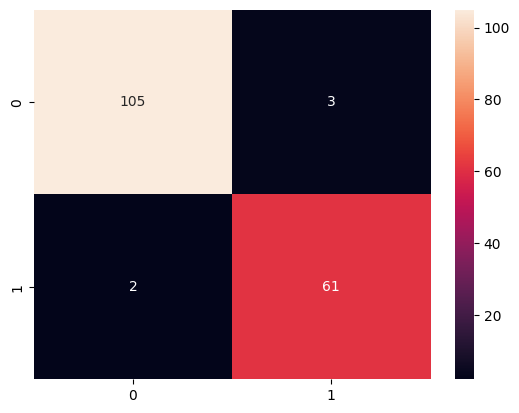

In [208]:
voting_clf = voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [210]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Model Tuning Using GridSearchCV

In [185]:
# Model Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Performance Reporting Function
def clf_performance(classifier, model_name):
    ''' This function will report the performance
    of each classifier that we impute to it'''
    print(model_name)
    print('Best score: ' + str(classifier.best_score_))
    print('Best parameters: ' + str(classifier.best_params_))

In [186]:
lr = LogisticRegression()

param_grid = {'max_iter' : [2000],
             'penalty': ['l1', 'l2'],
             'C': np.logspace(-4, 4, 20),
             'solver': ['liblinear', 'saga']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Logistic Regression
Best score: 0.9748734177215189
Best parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [187]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree'],
              'p': [1,2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
KNN
Best score: 0.9673417721518988
Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [188]:
svc = SVC(probability= True)

svc.get_params()

param_grid = [{'kernel': ['rbf'], 'gamma': [1, 2, 5, 10],
             'C': [1, 5, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [.1, .5, 1, 10, 100]},
              {'kernel': ['poly'], 'degree': [2,3,5], 'C':[.1, 1, 10, 100]}]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 37 candidates, totalling 185 fits
SVC
Best score: 0.9647468354430379
Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [189]:
rf = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [200, 250, 300],
             'criterion': ['entropy'],
             'bootstrap': [True],
             'max_depth': [5,10,15],
             'max_features': ['auto'],
             'min_samples_leaf': [2,3],
             'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest
Best score: 0.9572468354430379
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


<Axes: >

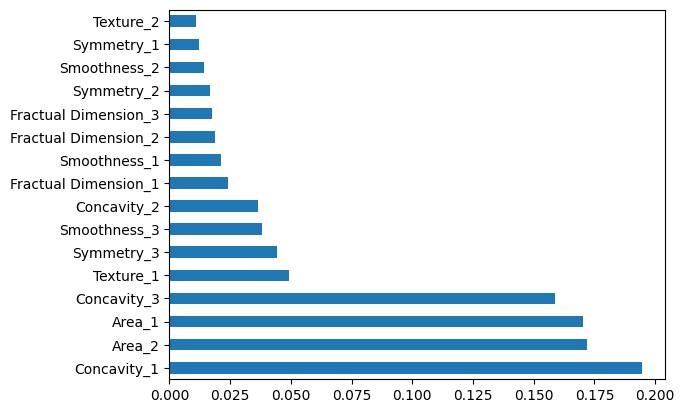

In [193]:
best_rf = best_clf_rf.best_estimator_.fit(X_train, y_train)
feature_importances = pd.Series(best_rf.feature_importances_, index=df_1.columns)
feature_importances.nlargest(20).plot(kind='barh')

In [194]:
xgb = XGBClassifier(random_state=42)

param_grid = {'n_estimators': [450, 500, 550],
             'max_depth': [None],
             'reg_alpha': [1],
             'reg_lambda': [2,5,10],
             'subsample': [0.55, 0.6, 0.65],
             'learning_rate': [0.01, 0.1],
             'gamma': [.5, 1, 2],
             'min_child_weight': [0.01],
             'sampling_method': ['uniform']}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_xbg = clf_xgb.fit(X_train, y_train)
clf_performance(best_clf_xbg, 'XGB')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
XGB
Best score: 0.9648101265822785
Best parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}


In [195]:
# Ensemble Approaches

best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xbg.best_estimator_

# Voting Classifier
voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('lr', best_lr), ('SVC', best_svc), ('rf', best_rf), ('xgb', best_xgb)], voting= 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('lr', best_lr), ('SVC', best_svc), ('rf', best_rf), ('xgb', best_xgb)], voting= 'soft')

print('voting_clf_hard: ', cross_val_score(voting_clf_hard, X_train, y_train, cv=5))
print('voting_clf_soft: ', cross_val_score(voting_clf_soft, X_train, y_train, cv=5))

voting_clf_hard:  [0.975      0.975      1.         0.96202532 0.97468354]
voting_clf_soft:  [0.9625     0.975      0.9875     0.96202532 0.97468354]


In [196]:
# Make Predictions
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

best_rf.fit(X_train, y_train)
y_hat_vch = voting_clf_hard.predict(X_test)
y_hat_rf = best_rf.predict(X_test)
y_hat_vcs = voting_clf_soft.predict(X_test)

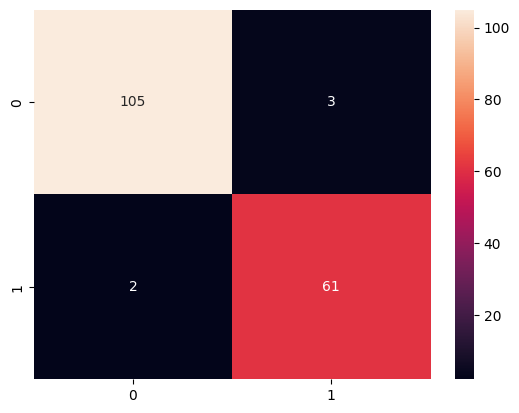

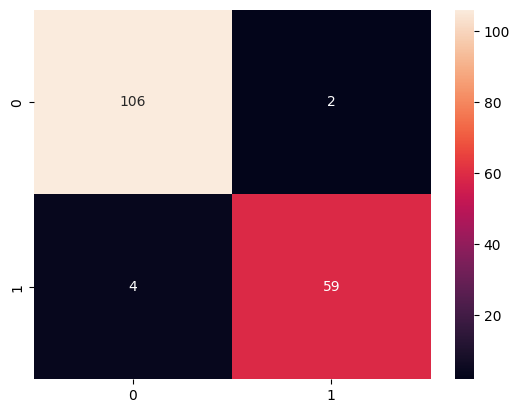

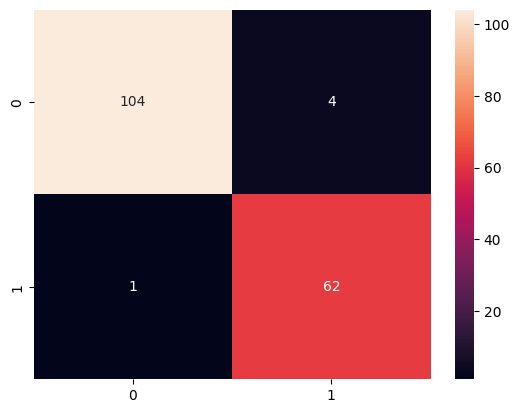

In [211]:
#Confusion Matrix Voting Classifer Hard
cm = confusion_matrix(y_test, y_hat_vch)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#Confusion Matrix Random Forest
cm = confusion_matrix(y_test, y_hat_rf)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#Confusion Matrix Voting Classifer Soft
cm = confusion_matrix(y_test, y_hat_vcs)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [214]:
print(classification_report(y_true=y_test, y_pred=y_hat_vch))
print('\n')
print(classification_report(y_true=y_test, y_pred=y_hat_rf))
print('\n')
print(classification_report(y_true=y_test, y_pred=y_hat_vcs))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [204]:
final_results = {'Id Number': y_test.index, 'Prediction': y_hat_rf}
submission = pd.DataFrame(data=final_results)

final_results2 = {'ID Number': y_test.index, 'Prediction': y_hat_vch}
submission_2 = pd.DataFrame(data=final_results2)

final_results3 = {'ID Number': y_test.index, 'Prediction': y_hat_vcs}
submission_3 = pd.DataFrame(data=final_results3)

final_data = {'ID Number': y_test.index, 'Survived_vch': y_hat_vch, 'Survived_rf': y_hat_rf, 'Survived_vcs': y_hat_vcs}

In [205]:
final_data = pd.DataFrame(final_data)

print(final_data)

     ID Number  Survived_vch  Survived_rf  Survived_vcs
0          204             0            0             0
1           70             1            1             1
2          131             1            1             1
3          431             0            0             0
4          540             0            0             0
..         ...           ...          ...           ...
166         69             0            0             0
167        542             0            0             0
168        176             0            0             0
169        501             1            1             1
170        247             0            0             0

[171 rows x 4 columns]
